# Traffic Volume Prediction

Give some attributes we have to predict the traffic volume.

**There are 9 attributes which represents the following -**

-    **date_time** - DateTime Hour of the data collected in local CST time
-    **holiday** - Categorical US National holidays plus regional holiday, Minnesota State Fair
-    **temp** - Numeric Average temp in kelvin
-    **rain_1h** - Numeric Amount in mm of rain that occurred in the hour
-    **snow_1h** - Numeric Amount in mm of snow that occurred in the hour
-    **clouds_all** - Numeric Percentage of cloud cover
-    **weather_main** - Categorical Short textual description of the current weather
-    **weather_description** - Categorical Longer textual description of the current weather
-    **traffic_volume** - Numeric Hourly I-94 ATR 301 reported westbound traffic volume (Target)

In [1]:
# import all required libraries for reading, analysing and visualizing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

## Data Analysis

In [2]:
train_df = pd.read_csv('./dataset/TRAIN.csv')
test_df = pd.read_csv('./dataset/TEST.csv')

In [3]:
print('Train Dataset shape: ', train_df.shape)
print('Test Dataset shape: ', test_df.shape)

Train Dataset shape:  (38563, 9)
Test Dataset shape:  (9641, 8)


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            38563 non-null  object 
 1   holiday              38563 non-null  object 
 2   temp                 38563 non-null  float64
 3   rain_1h              38563 non-null  float64
 4   snow_1h              38563 non-null  float64
 5   clouds_all           38563 non-null  int64  
 6   weather_main         38563 non-null  object 
 7   weather_description  38563 non-null  object 
 8   traffic_volume       38563 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.6+ MB


In [5]:
train_df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [6]:
train_df.describe(include = 'all')

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
count,38563,38563,38563.000000,38563.000000,38563.000000,38563.000000,38563,38563,38563.000000
unique,32607,12,NaN,NaN,NaN,NaN,11,38,NaN
top,2013-04-18 22:00:00,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,NaN
freq,6,38515,NaN,NaN,NaN,NaN,12680,8848,NaN
mean,NaN,NaN,281.351757,0.392733,0.000278,49.920364,NaN,NaN,3260.940409
std,NaN,NaN,13.216927,50.075055,0.009131,38.849106,NaN,NaN,1991.628329
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,272.858000,0.000000,0.000000,1.000000,NaN,NaN,1186.500000
50%,NaN,NaN,282.750000,0.000000,0.000000,64.000000,NaN,NaN,3378.000000
75%,NaN,NaN,291.540000,0.000000,0.000000,90.000000,NaN,NaN,4939.000000


In [7]:
train_df.isnull().sum()

date_time              0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64

In [8]:
test_df.isnull().sum()

date_time              0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
dtype: int64

## Data Visualization

In [9]:
# convert the date_time column to datetime type
train_df['date_time'] = pd.to_datetime(train_df['date_time'])
test_df['date_time'] = pd.to_datetime(test_df['date_time'])

### Time vs Traffic Volume

In [10]:
train_df['time'] = train_df['date_time'].dt.hour
test_df['time'] = test_df['date_time'].dt.hour

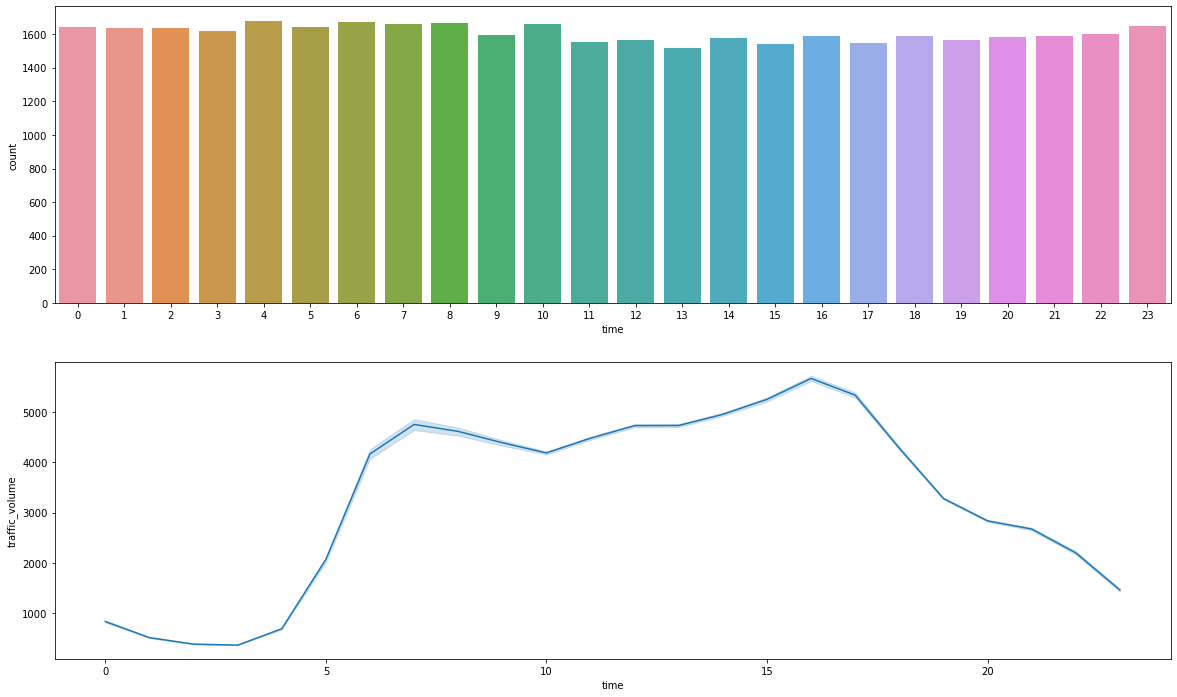

In [11]:
fig, (axis1,axis2) = plt.subplots(2, 1, figsize = (20,12))
sns.countplot(x = 'time', data = train_df, ax = axis1)
sns.lineplot(x = 'time', y = 'traffic_volume', data = train_df, ax = axis2);

Thus we can infer that traffic is much higher in morning and noon time and gradually decreases as night progresses.

### Month vs Traffic Volume

In [12]:
train_df['month'] = train_df['date_time'].dt.month
test_df['month'] = test_df['date_time'].dt.month

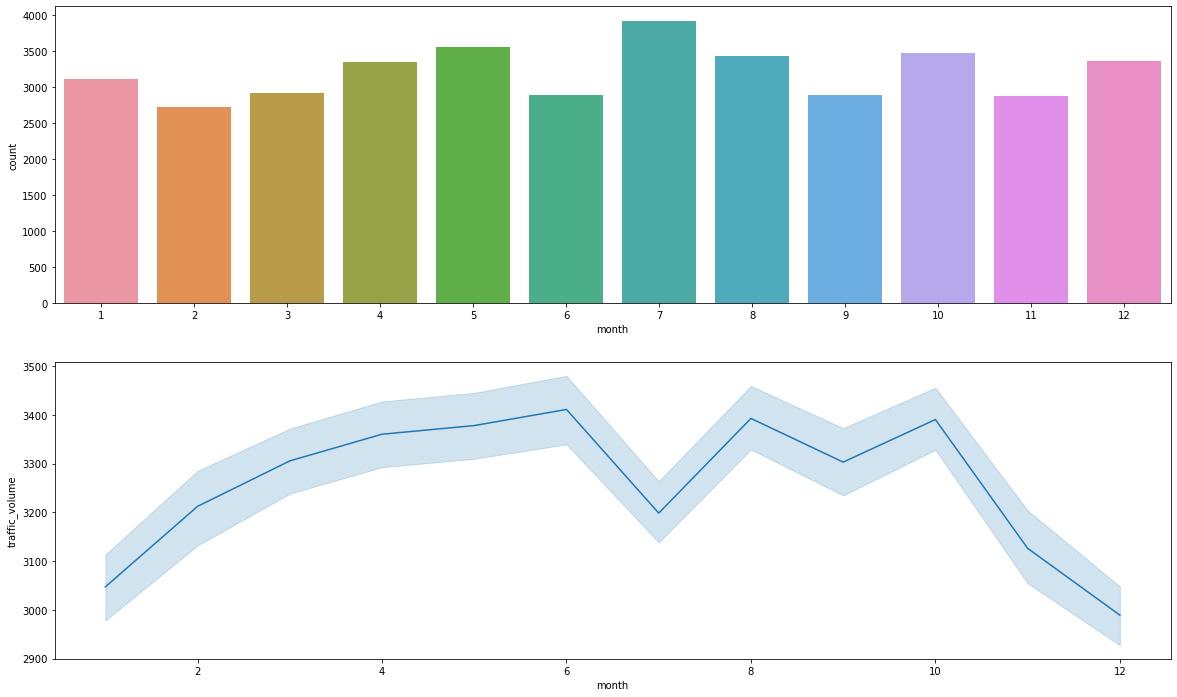

In [13]:
fig, (axis1,axis2) = plt.subplots(2, 1, figsize = (20,12))
sns.countplot(x = 'month', data = train_df, ax = axis1)
sns.lineplot(x = 'month', y = 'traffic_volume', data = train_df, ax = axis2);

Thus we can see that in the months when its cold, the traffic volume decreases is slightly less.

### Year vs Traffic Volume

In [14]:
train_df['year'] = train_df['date_time'].dt.year
test_df['year'] = test_df['date_time'].dt.year

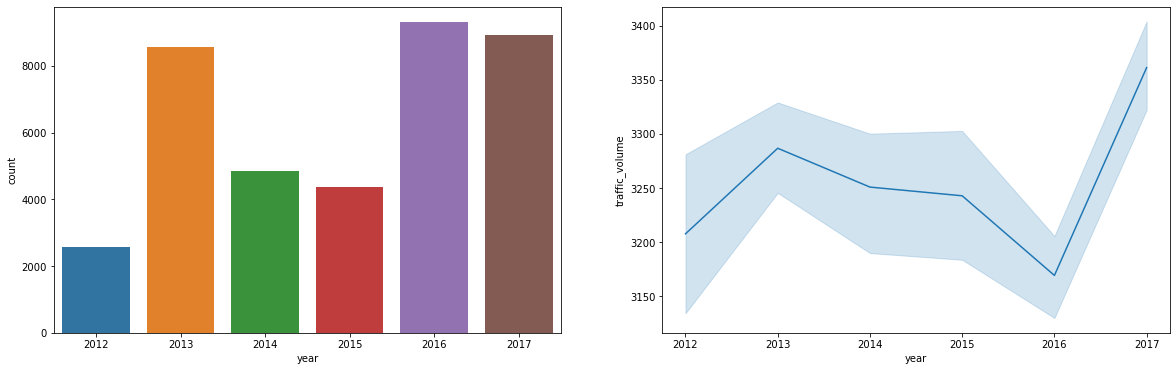

In [15]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (20,6))
sns.countplot(x = 'year', data = train_df, ax = axis1)
sns.lineplot(x = 'year', y = 'traffic_volume', data = train_df, ax = axis2);

### Day vs Traffic Volume

In [16]:
train_df['day'] = train_df['date_time'].dt.day_name()
test_df['day'] = test_df['date_time'].dt.day_name()

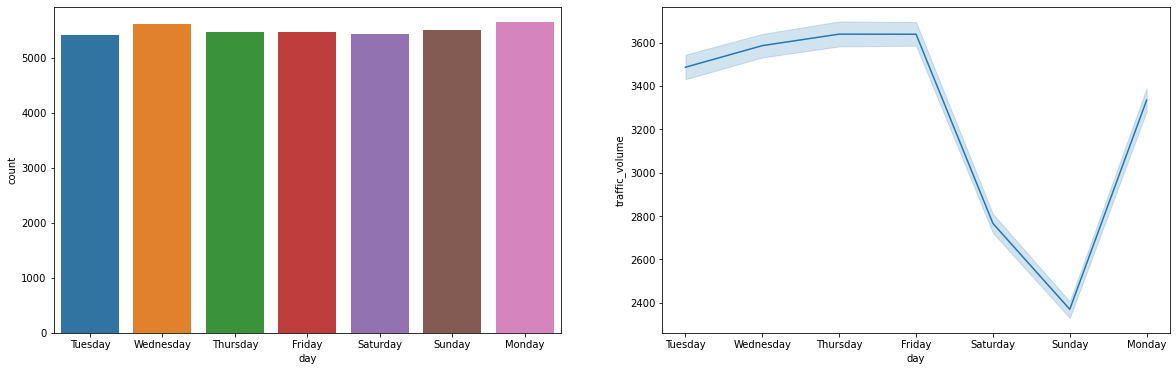

In [17]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (20,6))
sns.countplot(x = 'day', data = train_df, ax = axis1)
sns.lineplot(x = 'day', y = 'traffic_volume', data = train_df, ax = axis2);

### Holiday vs Traffic Volume

In [18]:
train_df['holiday'].value_counts()

None                         38515
Columbus Day                     5
Labor Day                        5
New Years Day                    5
Thanksgiving Day                 5
Christmas Day                    5
State Fair                       4
Independence Day                 4
Veterans Day                     4
Memorial Day                     4
Washingtons Birthday             4
Martin Luther King Jr Day        3
Name: holiday, dtype: int64

In [19]:
z = lambda x: False if x == 'None' else True
train_df['holiday'] = train_df['holiday'].apply(z)
test_df['holiday'] = test_df['holiday'].apply(z)

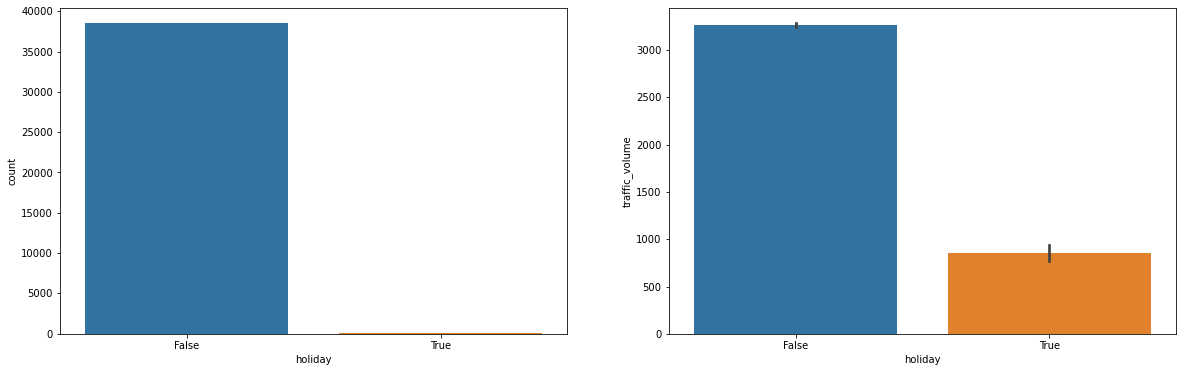

In [20]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (20,6))
sns.countplot(x = 'holiday', data = train_df, ax = axis1)
sns.barplot(x = 'holiday', y = 'traffic_volume', data = train_df, ax = axis2);

Thus from the above plots we can see that traffic on holidays is usually less than traffic on non holidays.

### Temperature vs Traffic Volume

In [21]:
(train_df['temp'] == 0).sum()

10

As the temperature can't be 0 kelvin therefore these are outliers.

In [22]:
train_df = train_df[train_df['temp'] != 0]

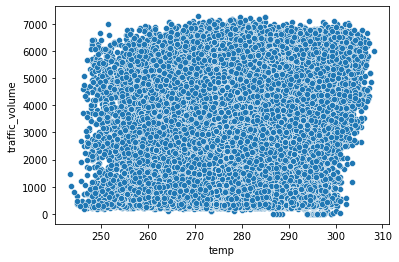

In [23]:
sns.scatterplot(x = 'temp', y = 'traffic_volume', data = train_df);

### Rain vs Traffic Volume

In [24]:
(train_df['rain_1h'] > 100).sum()

1

Therefore there is an outlier and we have to remove it.

In [25]:
train_df = train_df[train_df.rain_1h < 100]

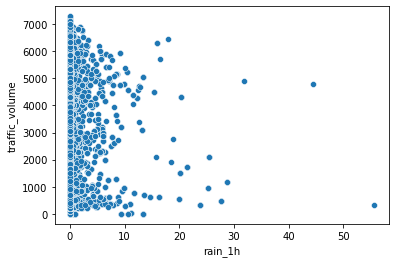

In [26]:
sns.scatterplot(x = 'rain_1h', y = 'traffic_volume', data = train_df);

### Snow vs Traffic Volume

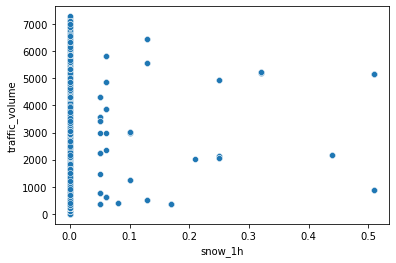

In [27]:
sns.scatterplot(x = 'snow_1h', y = 'traffic_volume', data = train_df);

### Clouds vs Traffic Volume

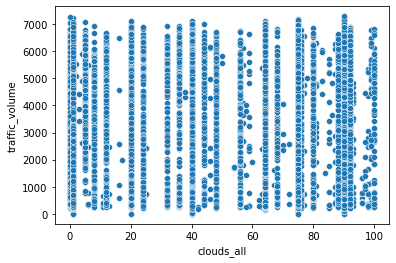

In [28]:
sns.scatterplot(x = 'clouds_all', y = 'traffic_volume', data = train_df);

### Short Weather Description vs Traffic Volume

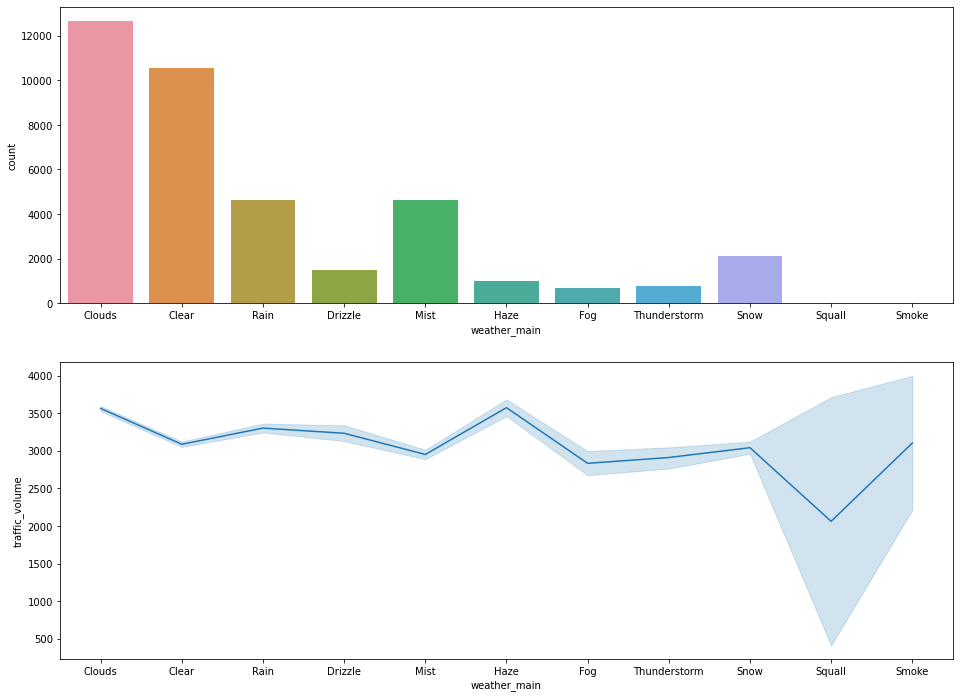

In [29]:
fig, (axis1,axis2) = plt.subplots(2, 1, figsize = (16,12))
sns.countplot(x = 'weather_main', data = train_df, ax = axis1)
sns.lineplot(x = 'weather_main', y = 'traffic_volume', data = train_df, ax = axis2);

### Long Weather Description vs Traffic Volume

In [30]:
train_df['weather_description'].value_counts()

sky is clear                           8838
mist                                   4611
overcast clouds                        4302
broken clouds                          3879
light rain                             2795
scattered clouds                       2791
Sky is Clear                           1712
few clouds                             1708
moderate rain                          1333
light snow                             1318
haze                                    993
light intensity drizzle                 871
fog                                     693
heavy snow                              587
drizzle                                 554
proximity thunderstorm                  489
heavy intensity rain                    387
snow                                    199
proximity shower rain                    94
thunderstorm                             88
heavy intensity drizzle                  56
thunderstorm with heavy rain             56
thunderstorm with light rain    

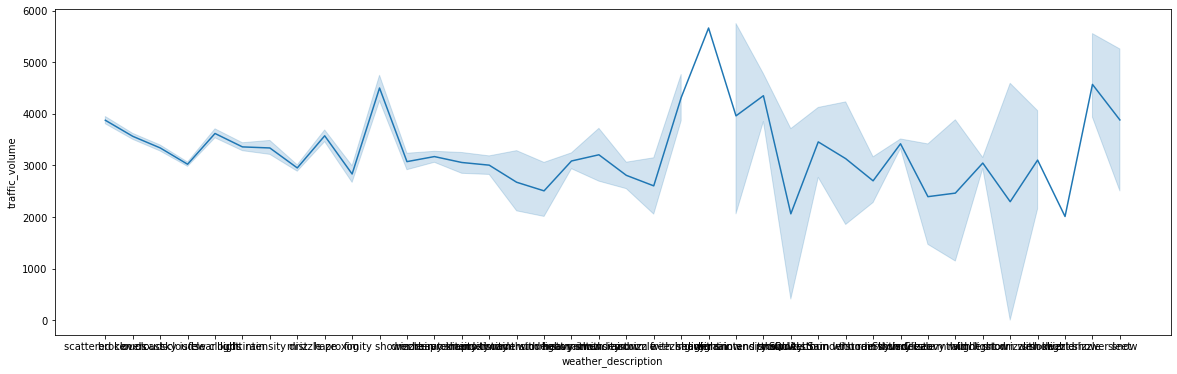

In [31]:
plt.figure(figsize = (20,6))
sns.lineplot(x = 'weather_description', y = 'traffic_volume', data = train_df);

Now we can see from the values of the column that it contains long description of the weather_main column, so we can drop it.

### Correlation between features

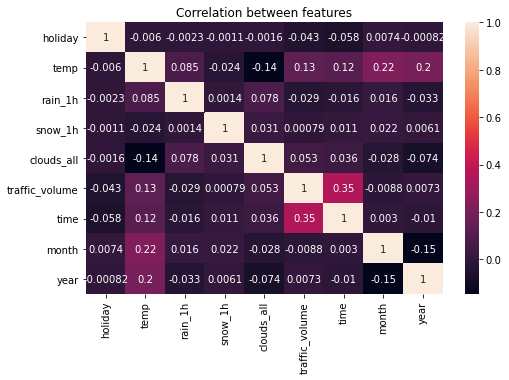

In [32]:
plt.figure(figsize=(8, 5))
plt.title('Correlation between features')
sns.heatmap(train_df.corr(), annot = True);

We can see from the above heatmap that features are not coorelated.

## Preprocessing of data

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
# drop the unrequired columns
train_df.drop(['date_time', 'weather_description'], axis = 1, inplace = True)
test_df.drop(['date_time', 'weather_description'], axis = 1, inplace = True)

In [35]:
# convert values of day column to numerical format
encoder = LabelEncoder()
train_df['day'] = encoder.fit_transform(train_df['day'])
test_df['day'] = encoder.transform(test_df['day'])

In [36]:
# subtract 242 from the temp column as there is no temperature below it
train_df['temp'] = train_df['temp'] - 242
test_df['temp'] = test_df['temp'] - 242

In [37]:
# convert the values of weather_main column to numerical format
encoder = LabelEncoder()
train_df['weather_main'] = encoder.fit_transform(train_df['weather_main'])
test_df['weather_main'] = encoder.transform(test_df['weather_main'])

## Machine Learning

In [38]:
# import the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [39]:
(X, Y) = (train_df.drop(['traffic_volume'], axis = 1).values, train_df['traffic_volume'].values)

X_test = test_df.values

# Scale the values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

(X_train, X_val, Y_train, Y_val) = train_test_split(X, Y)
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_val shape:" + str(X_val.shape))
print("Y_val shape:" + str(Y_val.shape))

X_train shape:(28914, 10)
Y_train shape:(28914,)
X_val shape:(9638, 10)
Y_val shape:(9638,)


In [40]:
# DataFrame to store the RMSE scores of various algorithms
results = pd.DataFrame(columns = ['RMSE'])

In [41]:
# helper function to evaluate a model
def evaluate_model(regressor, name):
    # train and test scores
    train_score = round(regressor.score(X_train, Y_train), 2)
    val_score = round(regressor.score(X_val, Y_val), 2)
    # predicted output
    Y_pred = regressor.predict(X_val)

    print(name + ' Train score: ', train_score)
    print(name + 'Test score: ', val_score)
    print('Root Mean Squared error: ', sqrt(mean_squared_error(Y_val, Y_pred)))
    print('Coefficient of determination: ', r2_score(Y_val, Y_pred))
    
    # add the current RMSE to the scores list
    results.loc[name] = sqrt(mean_squared_error(Y_val, Y_pred))
    
    # plot predicted vs true values
    x_points=np.linspace(0,8e3)
    plt.figure(figsize=(12,5))
    plt.plot(x_points, x_points, color='r')
    plt.scatter(Y_val, Y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True Values Vs Predicted Values');

### Using Linear Regression

In [42]:
lireg = LinearRegression()
lireg.fit(X_train, Y_train)

LinearRegression()

Linear Regression Train score:  0.14
Linear RegressionTest score:  0.14
Root Mean Squared error:  1841.3898320275457
Coefficient of determination:  0.14057646041885263


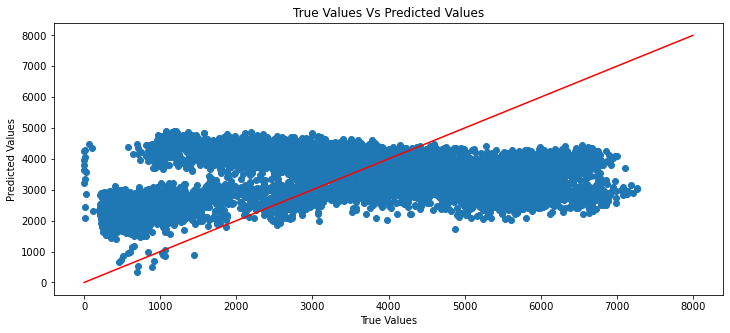

In [43]:
# evaluate the Regressor
evaluate_model(lireg, 'Linear Regression')

### Using Decision Tree Regressor

In [44]:
dtreg = DecisionTreeRegressor(max_depth = 12)
dtreg.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=12)

Decision Tree Train score:  0.96
Decision TreeTest score:  0.94
Root Mean Squared error:  502.1107251528966
Coefficient of determination:  0.9360979545813094


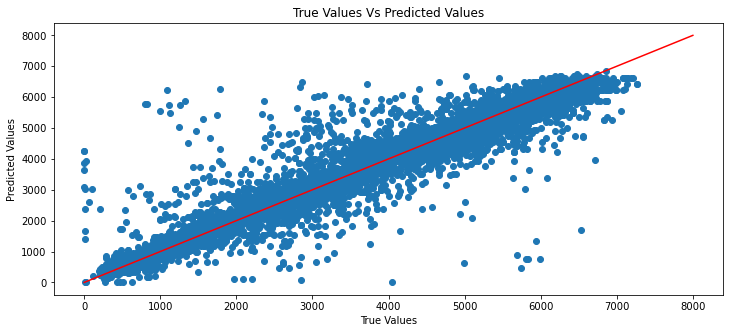

In [45]:
# evaluate the Regressor
evaluate_model(dtreg, 'Decision Tree')

### Using Random Forest Regressor

In [46]:
# n_estimators - The number of trees in the forest.
# min_samples_split - The minimum number of samples required to split an internal node
rfreg = RandomForestRegressor(n_estimators = 50, max_depth = 12, min_samples_split = 5)
rfreg.fit(X_train, Y_train)

RandomForestRegressor(max_depth=12, min_samples_split=5, n_estimators=50)

Random Forest Train score:  0.97
Random ForestTest score:  0.95
Root Mean Squared error:  440.33029423434186
Coefficient of determination:  0.9508557293182391


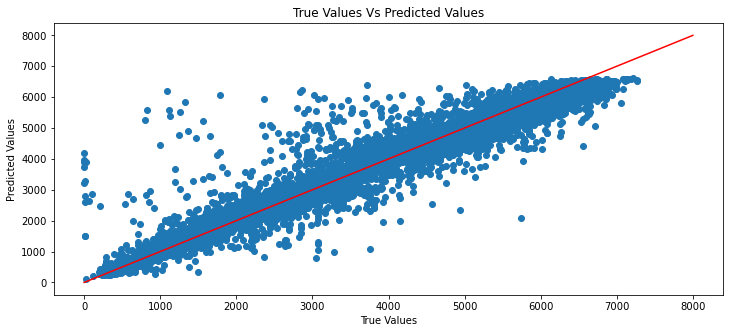

In [47]:
# evaluate the Regressor
evaluate_model(rfreg, 'Random Forest')

### Using Gradient Boosting

In [48]:
# n_estimators - The number of boosting stages to perform.
# max_depth - maximum depth of the individual regression estimators.
gbreg = GradientBoostingRegressor(n_estimators=500, max_depth=10)
gbreg.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=500)

Gradient Boosting Train score:  1.0
Gradient BoostingTest score:  0.96
Root Mean Squared error:  375.5631301505515
Coefficient of determination:  0.9642495375864738


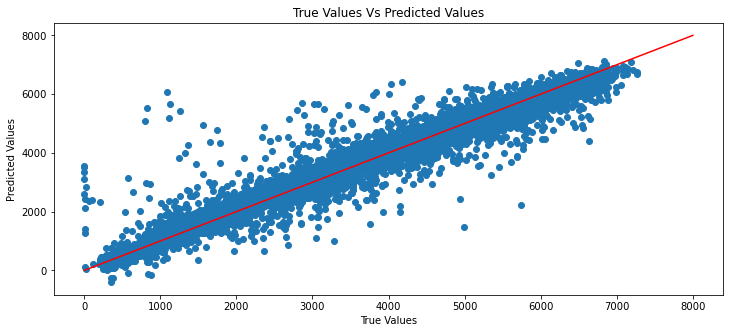

In [49]:
# evaluate the Regressor
evaluate_model(gbreg, 'Gradient Boosting')

### Using AdaBoost

In [50]:
# n_estimators - The number of trees in the forest.
# learning_rate - Learning rate shrinks the contribution of each classifier by learning_rate.
adareg = AdaBoostRegressor(base_estimator=dtreg, n_estimators=50, learning_rate=0.01)
adareg.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12),
                  learning_rate=0.01)

Ada Boost Train score:  0.97
Ada BoostTest score:  0.95
Root Mean Squared error:  437.27270851604754
Coefficient of determination:  0.9515358602163292


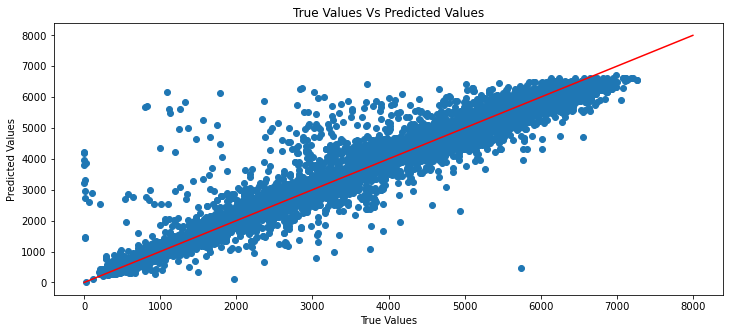

In [51]:
# evaluate the Regressor
evaluate_model(adareg, 'Ada Boost')

### Comparison between all the above algorithms

In [52]:
results

,RMSE
Linear Regression,1841.389832
Decision Tree,502.110725
Random Forest,440.330294
Gradient Boosting,375.563130
Ada Boost,437.272709


Thus we can see that **Gradient Boosting** provide the least RMSE, therefore we will use it to compute the outputs.

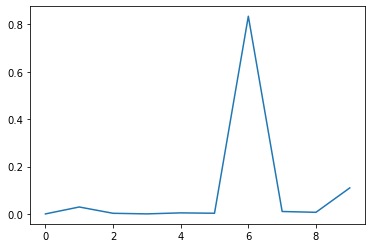

In [53]:
plt.plot(gbreg.feature_importances_)

The above plot shows that time and da are the most important features.

### Neural Networks using Keras

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

In [55]:
def nn_model ():
    model = Sequential()
    model.add(Dense(128, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [56]:
estimator = KerasRegressor(build_fn=nn_model, epochs=10, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)

In [57]:
estimator.fit(X_train, Y_train)

In [58]:
# predicted output
Y_pred_nn = estimator.predict(X_val)

print('Root Mean Squared error: ', sqrt(mean_squared_error(Y_val, Y_pred_nn)))
print('Coefficient of determination: ', r2_score(Y_val, Y_pred_nn))

Root Mean Squared error:  591.1899372626884
Coefficient of determination:  0.9114130335740983


## Writing the outputs to CSV file

In [59]:
Y_pred = gbreg.predict(X_test)

In [60]:
ids = np.arange(start = 0, stop = X_test.shape[0], step = 1)
ans = {'Index': ids, 'Value': Y_pred}

In [61]:
out = pd.DataFrame(ans)

In [65]:
out.to_csv('output.csv', index = False)